# Chatbot Log and Link

ChatGPT wouldn't allow me to create a link, so I posted the pdf chatlog of my history on GitHub, link is below

https://github.com/nehan-p/sta130/blob/main/SEM%20vs%20SD%20Differences%20(1).pdf

Here’s an expanded summary of our conversation:

Vaccine Data Analysis Assignment: We started by analyzing the effectiveness of a vaccine using a dataset of 10 patients, each with initial and final health scores. The aim was to determine whether the vaccine had a statistically significant effect on improving health scores.

Data Visualization: We discussed the importance of visually comparing the initial and final health scores using line and bar plots. The line plot showed how each patient’s health score changed after taking the vaccine, while the bar plot provided a comparison of average initial and final scores. These visualizations helped us see that most patients had improved health scores post-vaccination.

Bootstrapping for Quantitative Analysis: We used bootstrapping to estimate the confidence interval for the mean difference between initial and final health scores. By resampling the data multiple times, we calculated the 95% confidence interval for the mean difference, which came out to be (0.7, 5.5). This interval shows that the vaccine likely led to a positive improvement in health.

Conclusion: Based on the bootstrapping analysis, we concluded that the vaccine has a statistically significant effect. Since the confidence interval does not include zero, we could reject the null hypothesis that the vaccine has no effect. The vaccine likely improves health scores by an average of 0.7 to 5.5 points.

Limitations: We discussed the small sample size (10 patients) as a limitation, which means the results should be interpreted with caution. A larger study would provide more reliable and generalizable findings about the vaccine’s effectiveness.

Refining the Conclusion: You requested a shorter conclusion that still captured the main points. We crafted a concise conclusion emphasizing the positive effect of the vaccine, the statistical significance of the results, and the sample size limitations.

Overall, we used a combination of data visualization and bootstrapping to analyze the vaccine's effectiveness and provided a detailed yet clear conclusion about its positive impact on health scores.

# Question 1

The standard deviation is a measure of the spread of the individual data points in a given dataset.  Essentially, it gives an idea of how much each point deviates from the mean, which provides a good idea of how spread, or uniform a datatset is.

On the other hand, the standard error of the mean measures the variation of a bunch of sample means.  Specifically, if you repetitively drew multiple samples from a population.  The SEM gives an idea of how much the actual calculated mean will fluctuate around the true population mean.


# Question 2

Firstly we need to calculate the sample mean, which is the average of the points in the sample.  In bootstrapping, there's many different samples with replacement, and the average of all of these is the bootstrapped mean.
Then we need to calculate the SEM, which is the standard deviation of the bootstrapped sample means.
Then, we multiple the SEM by 1.96, and finally to get the lower and upper bound, we add and substract the SEM respectively.

# Question 3

Firstly we need to get a collection of bootstrapped sample means as previously done.  Then, we will sort them in ascending order so we can easily determine percentiles.
Then, using the np.quantile() function, we would find the percentiles by getting the lower bound (2.5th percentile) and the upper bound (97.5th percentile) of the bootstrapped sample means.

# Question 4

In [ ]:
import numpy as np

# Sample data for this example
sample = [10, 20, 30, 40, 50]

# Total number of times the bootstrap will resample
n_bootstrap = 1000

# Stores the median of the bootstrapped samples
bootstrapped_medians = []

# Perform bootstrapping using a for loop, in the given rangle from above
for i in range(n_bootstrap):
    # Resampling with replacement from the sample
    boot_sample = np.random.choice(sample, size=len(sample), replace=True)
    # Calculate the median of the resample and store it
    bootstrapped_medians.append(np.median(boot_sample))

# Calculating the 2.5th and 97.5th percentiles for the confidence interval so we can get 95% confidence interval
lower_bound = np.percentile(bootstrapped_medians, 2.5)
upper_bound = np.percentile(bootstrapped_medians, 97.5)

# Print the 95% confidence interval for the median
print(f"95% Confidence Interval for the Population Median: ({lower_bound}, {upper_bound})")


95% Confidence Interval for the Population Median: (10.0, 50.0)


# Question 5


We need to distinguish between a population parameter and a sample statistic because a population parameter is the true value we want to know, while a sample statistic is an estimate based on a small group (the sample). Confidence intervals use the sample statistic to provide a range where the true population parameter likely falls. Understanding the difference helps us recognize that the confidence interval expresses the uncertainty in using a sample to estimate the larger population.

# Question 6

1. Bootstrapping is when you randomly take samples from a sample that you've already taken, and allow repeats.  You can do this multiple times, hundreds, thousands, really anything that a computer will be able to do.  For each of those samples, you calculate a specific statistic like mean or standard deviation, and at the end you get a lot of statistics which help you understand the overall population better.
2. The main reason to use bootstrapping is to find out how reliable a sample stat is, for example the average length of a fish.  With a sample of 10-20 fish for example, you can use bootstrapping to see how accurate the average is and give you a more accurate range of where the real average is likely to lie.
3. Using the fish example, let's say you think the average length of a type of fish is 15cm, you can use bootstrapping to see how accurate your guess is.  After getting all of the sample averages, you can see if a large amount of the data is around your guess, and if it is, your guess is a reasonable average, and if it isn't, then your guess may not be as accurate.

#Question 7

If you’re testing a drug and the confidence interval for its effect on average is (-1, 2), this includes zero. So, you can't be sure the drug does anything because zero (no effect) is within the range of possible outcomes.  This means we cannot reject the null hypothesis.

However, if the confidence interval was (0.5, 2), zero isn’t in this range. You could confidently reject the null hypothesis and conclude the drug has an effect, since the drug not having an effect (0) is not in the interval.

# Question 8

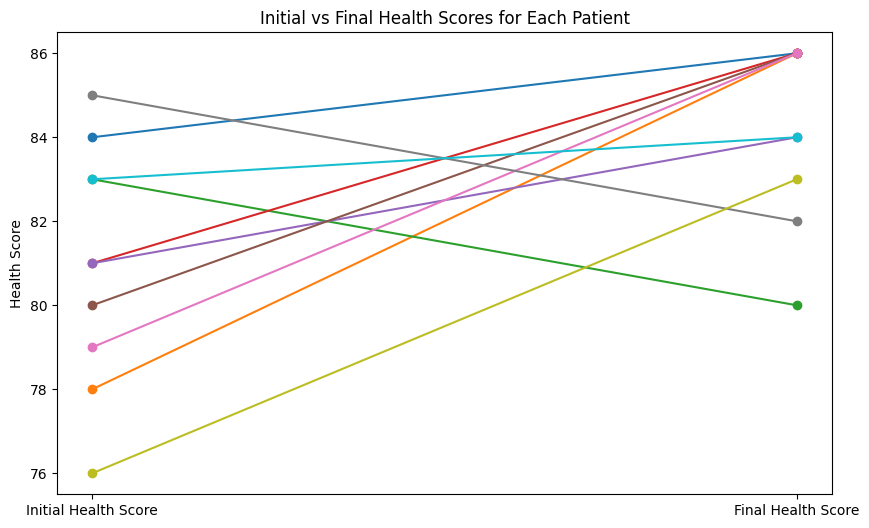

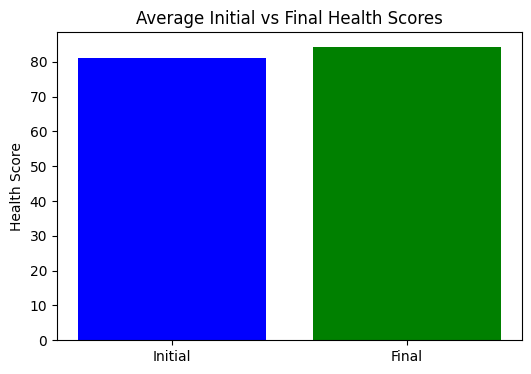

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (assuming it's saved in a CSV file)
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Line plot to visualize changes in health scores for each patient
plt.figure(figsize=(10, 6))
for i in range(len(df)):
    plt.plot([0, 1], [df['InitialHealthScore'][i], df['FinalHealthScore'][i]], marker='o', label=f'Patient {df["PatientID"][i]}')
plt.xticks([0, 1], ['Initial Health Score', 'Final Health Score'])
plt.title('Initial vs Final Health Scores for Each Patient')
plt.ylabel('Health Score')
plt.show()

# Bar plot to compare average initial and final scores
plt.figure(figsize=(6, 4))
plt.bar(['Initial', 'Final'], [df['InitialHealthScore'].mean(), df['FinalHealthScore'].mean()], color=['blue', 'green'])
plt.title('Average Initial vs Final Health Scores')
plt.ylabel('Health Score')
plt.show()


95% Confidence Interval for the Mean Difference: (0.7, 5.5)


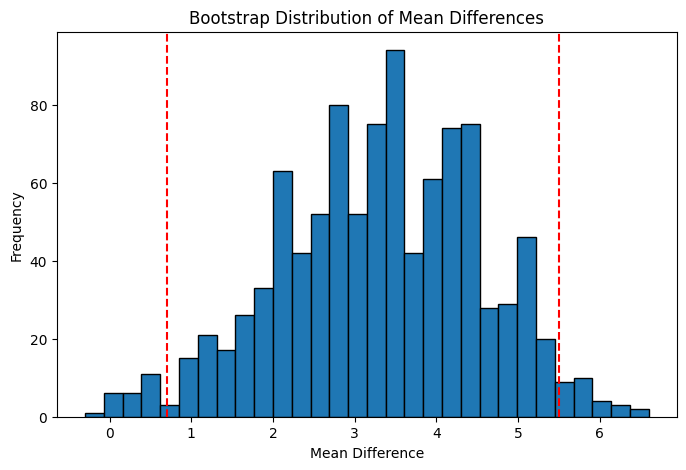

In [ ]:
import numpy as np

# Calculate the difference between Final and Initial Health Scores
df['Difference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping method
np.random.seed(42)
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = np.random.choice(df['Difference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Display the confidence interval
print(f"95% Confidence Interval for the Mean Difference: ({lower_bound}, {upper_bound})")

# Plotting bootstrap distribution
plt.figure(figsize=(8, 5))
plt.hist(bootstrap_means, bins=30, edgecolor='k')
plt.axvline(lower_bound, color='r', linestyle='--')
plt.axvline(upper_bound, color='r', linestyle='--')
plt.title('Bootstrap Distribution of Mean Differences')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.show()


The bootstrapping analysis gives a 95% confidence interval of (0.7, 5.5) for the average improvement in health scores after taking the vaccine. Since the interval does not include zero, we can confidently reject the null hypothesis that the vaccine has no effect. This means the vaccine likely leads to an improvement in health, with an average increase in health scores between 0.7 and 5.5 points.

This suggests the vaccine is statistically effective, though the small sample size limits the generalizability of the results. A larger study would strengthen confidence in these findings and help determine whether the observed effect is consistent across different groups of patients.